# E-Commerce Data Analysis - Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis (EDA) of an e-commerce dataset.
The analysis examines key business metrics including revenue trends, customer behavior, product performance,
and geographic distribution of sales.

## Analysis Period
This analysis is configurable to any date range. By default, it analyzes data from 2022-2023.


## Table of Contents

1. [Introduction & Configuration](#introduction)
2. [Data Dictionary](#data-dictionary)
3. [Data Loading & Exploration](#data-loading)
4. [Data Preparation](#data-preparation)
5. [Revenue Analysis](#revenue-analysis)
6. [Order Analysis](#order-analysis)
7. [Product Category Analysis](#product-analysis)
8. [Geographic Analysis](#geographic-analysis)
9. [Customer Experience Analysis](#customer-experience)
10. [Order Status Distribution](#order-status)
11. [Key Insights & Summary](#summary)


## Data Dictionary

### Key Tables

**orders_dataset.csv**
- `order_id`: Unique identifier for each order
- `customer_id`: Identifier linking to the customer
- `order_status`: Current status of the order (canceled, delivered, pending, processing, shipped, returned)
- `order_purchase_timestamp`: Date and time when the order was placed
- `order_delivered_customer_date`: Date when the order was delivered to the customer

**order_items_dataset.csv**
- `order_id`: Links to orders table
- `order_item_id`: Sequential item number within an order
- `product_id`: Links to products table
- `price`: Price of the individual item
- `freight_value`: Shipping cost for the item

**products_dataset.csv**
- `product_id`: Unique product identifier
- `product_category_name`: Category of the product
- `product_description_length`: Length of product description
- `product_weight_g`: Weight in grams
- `product_photos_qty`: Number of product photos

**customers_dataset.csv**
- `customer_id`: Unique customer identifier
- `customer_state`: State where customer is located (US states)
- `customer_city`: City of customer

**order_reviews_dataset.csv**
- `review_id`: Unique review identifier
- `order_id`: Links to orders table
- `review_score`: Rating from 1 (lowest) to 5 (highest)
- `review_creation_date`: When the review was posted

### Key Business Metrics
- **Revenue**: Total sales from delivered orders
- **Average Order Value (AOV)**: Mean revenue per order
- **Delivery Speed**: Days between order placement and delivery
- **Review Score**: Customer satisfaction rating (1-5 scale)


## Introduction & Configuration {#introduction}

### Analysis Parameters
Configure the date range for analysis by setting the following parameters.
The analysis will filter all datasets to include only orders within the specified period.


In [1]:
# Analysis Configuration
# Set the date range for analysis
# Leave values as None to include all available data

ANALYSIS_START_YEAR = 2022
ANALYSIS_START_MONTH = None  # None defaults to January
ANALYSIS_END_YEAR = 2023
ANALYSIS_END_MONTH = None    # None defaults to December

# Comparison year (for YoY metrics)
COMPARISON_YEAR = 2022
CURRENT_YEAR = 2023

# Visualization parameters
FIGURE_SIZE = (12, 6)
COLOR_PRIMARY = '#1f77b4'
COLOR_SECONDARY = '#ff7f0e'

In [2]:
%matplotlib inline

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from data_loader import load_datasets, prepare_analysis_dataset
from business_metrics import (
    calculate_total_revenue,
    calculate_revenue_growth,
    calculate_revenue_by_period,
    calculate_monthly_growth_trend,
    calculate_total_orders,
    calculate_orders_by_period,
    calculate_average_order_value,
    calculate_average_order_value_by_period,
    calculate_revenue_by_category,
    calculate_revenue_by_state,
    calculate_delivery_speed_rating_correlation,
    calculate_delivery_time_rating_correlation,
    calculate_average_review_score,
    calculate_average_delivery_speed,
    calculate_review_score_distribution,
    calculate_order_status_distribution,
    calculate_key_metrics
)

# Configure matplotlib defaults
plt.style.use('default')
plt.rcParams['figure.figsize'] = FIGURE_SIZE
plt.rcParams['font.size'] = 10

print("All libraries and custom modules loaded successfully!")

All libraries and custom modules loaded successfully!


## Data Loading & Exploration {#data-loading}

Load all datasets from the ecommerce_data directory and perform initial exploration
to understand data structure and content.


In [3]:
# Load all datasets
orders, order_items, products, customers, reviews = load_datasets('ecommerce_data')

print(f"Orders dataset shape: {orders.shape}")
print(f"Order Items dataset shape: {order_items.shape}")
print(f"Products dataset shape: {products.shape}")
print(f"Customers dataset shape: {customers.shape}")
print(f"Reviews dataset shape: {reviews.shape}")

Orders dataset shape: (10000, 8)
Order Items dataset shape: (16047, 7)
Products dataset shape: (6000, 9)
Customers dataset shape: (8000, 5)
Reviews dataset shape: (6571, 7)


In [4]:
# Display sample records from each dataset
print("Orders Sample:")
print(orders.head(3))
print("\nOrder Items Sample:")
print(order_items.head(3))
print("\nProducts Sample:")
print(products.head(3))

Orders Sample:
                       order_id                    customer_id order_status  \
0  ord_d25ca0e820f231046c70dd33  cust_d6ec876eea63d04ced06e168     canceled   
1  ord_5fa044951857e02fd1347b47  cust_2d36e4b647be13c15df550af    delivered   
2  ord_0a02a8a1d3d282380ed7d0cc  cust_157f0ea0316c546ac08dae30    delivered   

     order_purchase_timestamp           order_approved_at  \
0  2023-04-24 12:18:14.590086  2023-04-25 00:18:14.590086   
1  2023-04-24 13:05:32.579655  2023-04-26 02:05:32.579655   
2  2022-05-15 07:51:22.471390  2022-05-17 01:51:22.471390   

  order_delivered_carrier_date order_delivered_customer_date  \
0                          NaN                           NaN   
1   2023-04-27 02:05:32.579655    2023-05-01 02:05:32.579655   
2   2022-05-20 01:51:22.471390    2022-05-23 01:51:22.471390   

  order_estimated_delivery_date  
0    2023-05-02 00:18:14.590086  
1    2023-05-11 02:05:32.579655  
2    2022-05-26 01:51:22.471390  

Order Items Sample:
         

In [5]:
# Basic data characteristics
print("Product Categories:")
print(f"Total unique products: {products['product_id'].nunique()}")
print(f"Total unique categories: {products['product_category_name'].nunique()}")
print(f"\nCategories available:")
print(products['product_category_name'].unique())

print(f"\n\nOrder Status distribution:")
print(orders['order_status'].value_counts())

Product Categories:
Total unique products: 6000
Total unique categories: 13

Categories available:
['books_media' 'grocery_gourmet_food' 'electronics' 'sports_outdoors'
 'home_garden' 'pet_supplies' 'automotive' 'health_personal_care'
 'toys_games' 'beauty_personal_care' 'clothing_shoes_jewelry'
 'tools_home_improvement' 'baby_products']


Order Status distribution:
order_status
delivered     9388
shipped        297
canceled       135
processing     120
pending         39
returned        21
Name: count, dtype: int64


In [6]:
# Order Items basic statistics
print("Order Items Statistics:")
print(order_items[['price', 'freight_value']].describe())

Order Items Statistics:
              price  freight_value
count  16047.000000   16047.000000
mean     451.136576      45.509333
std      473.862118      61.182962
min        5.020000       0.000000
25%       94.695000       6.540000
50%      256.360000      19.950000
75%      662.875000      57.770000
max     1999.350000     385.230000


## Data Preparation {#data-preparation}

Prepare and clean the datasets for analysis:
- Merge order and item data
- Extract temporal features (year, month)
- Filter to delivered orders only
- Calculate delivery metrics
- Apply date range filters


In [7]:
# Prepare analysis dataset using custom functions
sales_delivered, products_clean, customers_clean, reviews_clean = prepare_analysis_dataset(
    orders,
    order_items,
    products,
    customers,
    reviews,
    start_year=ANALYSIS_START_YEAR,
    start_month=ANALYSIS_START_MONTH,
    end_year=ANALYSIS_END_YEAR,
    end_month=ANALYSIS_END_MONTH
)

print(f"Prepared dataset shape: {sales_delivered.shape}")
print(f"Date range in data: {sales_delivered['order_purchase_timestamp'].min()} to {sales_delivered['order_purchase_timestamp'].max()}")
print(f"Years covered: {sorted(sales_delivered['year'].unique())}")
print(f"\nData sample:")
print(sales_delivered.head(3))

Prepared dataset shape: (15089, 12)
Date range in data: 2022-01-01 00:32:24.388479 to 2023-12-31 21:54:19.519892
Years covered: [np.int32(2022), np.int32(2023)]

Data sample:
                       order_id  order_item_id                     product_id  \
2  ord_5fa044951857e02fd1347b47              1  prod_9b6f1793388ae983f852d189   
3  ord_5fa044951857e02fd1347b47              2  prod_c7b5997a4d0061a9f50e874c   
4  ord_0a02a8a1d3d282380ed7d0cc              1  prod_d5f7b6e420ea5cffc504ab21   

     price  freight_value                    customer_id order_status  \
2   111.91           9.50  cust_2d36e4b647be13c15df550af    delivered   
3   878.42          77.50  cust_2d36e4b647be13c15df550af    delivered   
4  1030.31          15.47  cust_157f0ea0316c546ac08dae30    delivered   

    order_purchase_timestamp order_delivered_customer_date  year  month  \
2 2023-04-24 13:05:32.579655    2023-05-01 02:05:32.579655  2023      4   
3 2023-04-24 13:05:32.579655    2023-05-01 02:05:32.57965

In [8]:
# Create separate datasets for each year for comparison
sales_current = sales_delivered[sales_delivered['year'] == CURRENT_YEAR]
sales_previous = sales_delivered[sales_delivered['year'] == COMPARISON_YEAR]

print(f"Current year ({CURRENT_YEAR}) records: {len(sales_current)}")
print(f"Previous year ({COMPARISON_YEAR}) records: {len(sales_previous)}")

Current year (2023) records: 7448
Previous year (2022) records: 7641


## Revenue Analysis {#revenue-analysis}

Analyze revenue metrics including total revenue, year-over-year growth,
and monthly trends.


In [9]:
# Total Revenue by Year
revenue_by_year = calculate_revenue_by_period(sales_delivered, 'year')

current_revenue = calculate_total_revenue(sales_current)
previous_revenue = calculate_total_revenue(sales_previous)
revenue_growth = calculate_revenue_growth(current_revenue, previous_revenue)

print(f"Revenue Summary:")
print(f"={'='*50}")
print(f"Total Revenue {CURRENT_YEAR}: ${current_revenue:,.2f}")
print(f"Total Revenue {COMPARISON_YEAR}: ${previous_revenue:,.2f}")
print(f"Year-over-Year Growth: {revenue_growth*100:.2f}%")
print(f"\nRevenue by Year:")
print(revenue_by_year)

Revenue Summary:
Total Revenue 2023: $3,360,294.74
Total Revenue 2022: $3,445,076.96
Year-over-Year Growth: -2.46%

Revenue by Year:
year
2022    3445076.96
2023    3360294.74
Name: price, dtype: float64


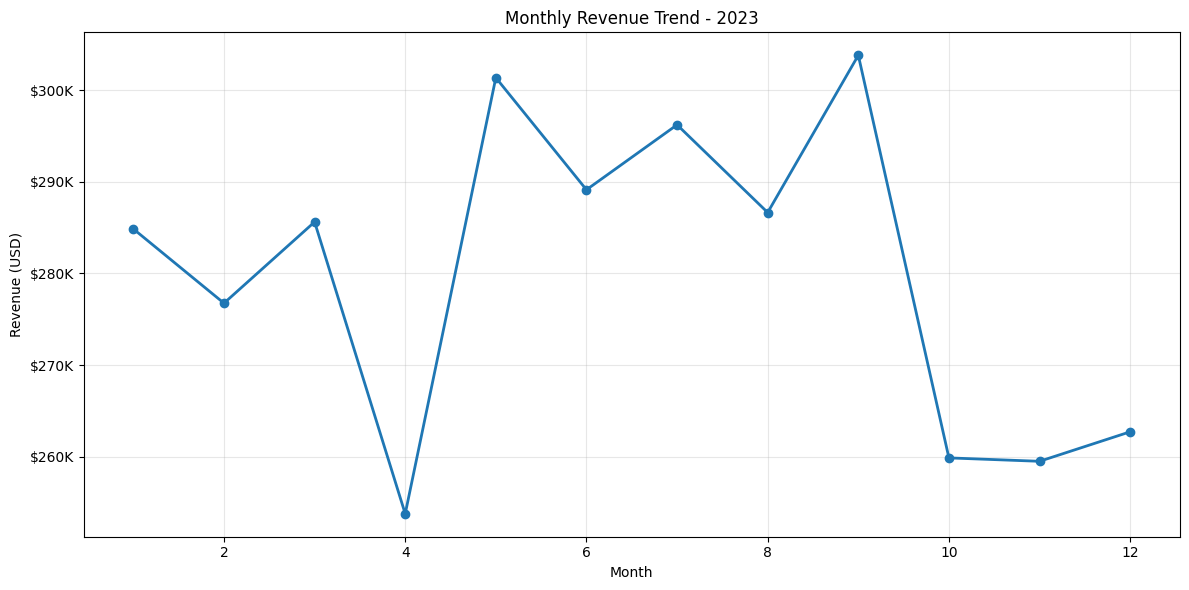

Monthly Revenue - 2023:
 Month   Revenue
     1 284855.48
     2 276758.54
     3 285618.77
     4 253794.62
     5 301347.96
     6 289126.72
     7 296209.39
     8 286645.60
     9 303793.15
    10 259890.15
    11 259518.93
    12 262735.43


In [10]:
# Monthly Revenue Trend
monthly_revenue = sales_current.groupby('month')['price'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Revenue']

fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', color=COLOR_PRIMARY, linewidth=2)
ax.set_xlabel('Month')
ax.set_ylabel('Revenue (USD)')
ax.set_title(f'Monthly Revenue Trend - {CURRENT_YEAR}')
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M' if x >= 1e6 else f'${x/1e3:.0f}K'))
plt.tight_layout()
plt.show()

print(f"Monthly Revenue - {CURRENT_YEAR}:")
print(monthly_revenue.to_string(index=False))

In [11]:
# Month-over-Month Growth Rate
monthly_growth = calculate_monthly_growth_trend(sales_current)
avg_monthly_growth = monthly_growth.mean()

print(f"Month-over-Month Growth Analysis - {CURRENT_YEAR}:")
print(f"Average Growth Rate: {avg_monthly_growth*100:.2f}%")
print(f"\nGrowth by Month:")
for month, growth in monthly_growth.items():
    if pd.notna(growth):
        print(f"Month {month:2d}: {growth*100:7.2f}%")

Month-over-Month Growth Analysis - 2023:
Average Growth Rate: -0.39%

Growth by Month:
Month  2:   -2.84%
Month  3:    3.20%
Month  4:  -11.14%
Month  5:   18.74%
Month  6:   -4.06%
Month  7:    2.45%
Month  8:   -3.23%
Month  9:    5.98%
Month 10:  -14.45%
Month 11:   -0.14%
Month 12:    1.24%


## Order Analysis {#order-analysis}

Analyze order volume and average order value metrics.


In [12]:
# Total Orders
total_orders_current = calculate_total_orders(sales_current)
total_orders_previous = calculate_total_orders(sales_previous)
orders_growth = calculate_revenue_growth(total_orders_current, total_orders_previous)

print(f"Order Volume Summary:")
print(f"{'='*50}")
print(f"Total Orders {CURRENT_YEAR}: {total_orders_current:,}")
print(f"Total Orders {COMPARISON_YEAR}: {total_orders_previous:,}")
print(f"Year-over-Year Growth: {orders_growth*100:.2f}%")

Order Volume Summary:
Total Orders 2023: 4,635
Total Orders 2022: 4,749
Year-over-Year Growth: -2.40%


In [13]:
# Average Order Value
aov_current = calculate_average_order_value(sales_current)
aov_previous = calculate_average_order_value(sales_previous)
aov_growth = calculate_revenue_growth(aov_current, aov_previous)

print(f"Average Order Value Summary:")
print(f"{'='*50}")
print(f"AOV {CURRENT_YEAR}: ${aov_current:,.2f}")
print(f"AOV {COMPARISON_YEAR}: ${aov_previous:,.2f}")
print(f"Year-over-Year Change: {aov_growth*100:.2f}%")

Average Order Value Summary:
AOV 2023: $724.98
AOV 2022: $725.43
Year-over-Year Change: -0.06%


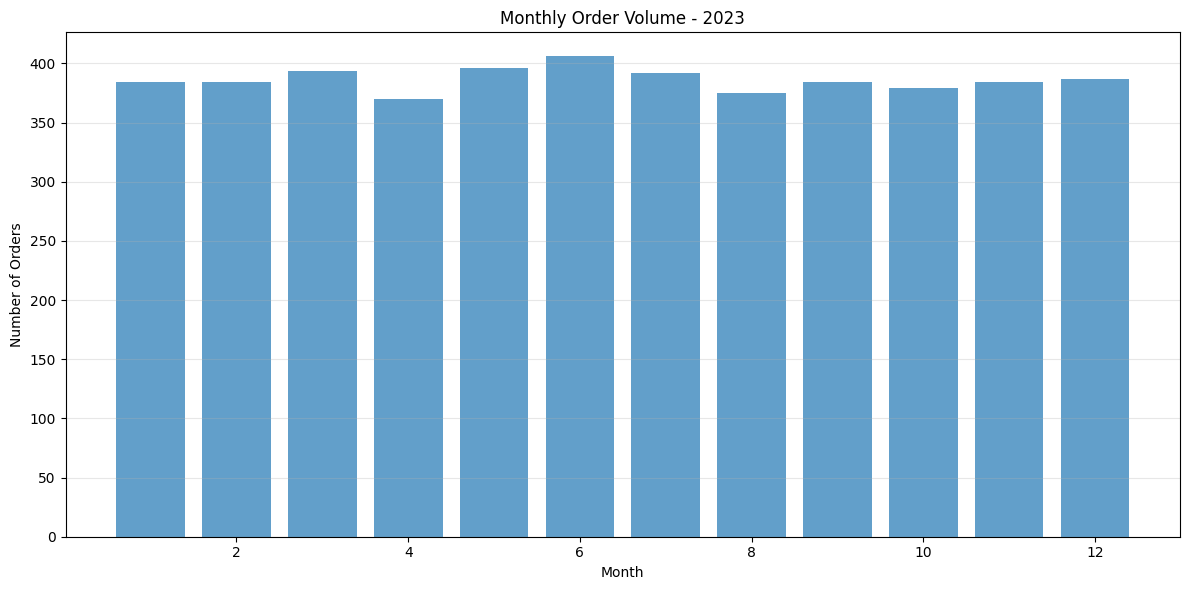

Orders by Month - 2023:
Month  1:   384 orders
Month  2:   384 orders
Month  3:   394 orders
Month  4:   370 orders
Month  5:   396 orders
Month  6:   406 orders
Month  7:   392 orders
Month  8:   375 orders
Month  9:   384 orders
Month 10:   379 orders
Month 11:   384 orders
Month 12:   387 orders


In [14]:
# Orders by Month
monthly_orders = calculate_orders_by_period(sales_current, 'month')

fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.bar(monthly_orders.index, monthly_orders.values, color=COLOR_PRIMARY, alpha=0.7)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders')
ax.set_title(f'Monthly Order Volume - {CURRENT_YEAR}')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Orders by Month - {CURRENT_YEAR}:")
for month, order_count in monthly_orders.items():
    print(f"Month {month:2d}: {order_count:5,} orders")

## Product Category Analysis {#product-analysis}

Analyze revenue distribution across product categories.


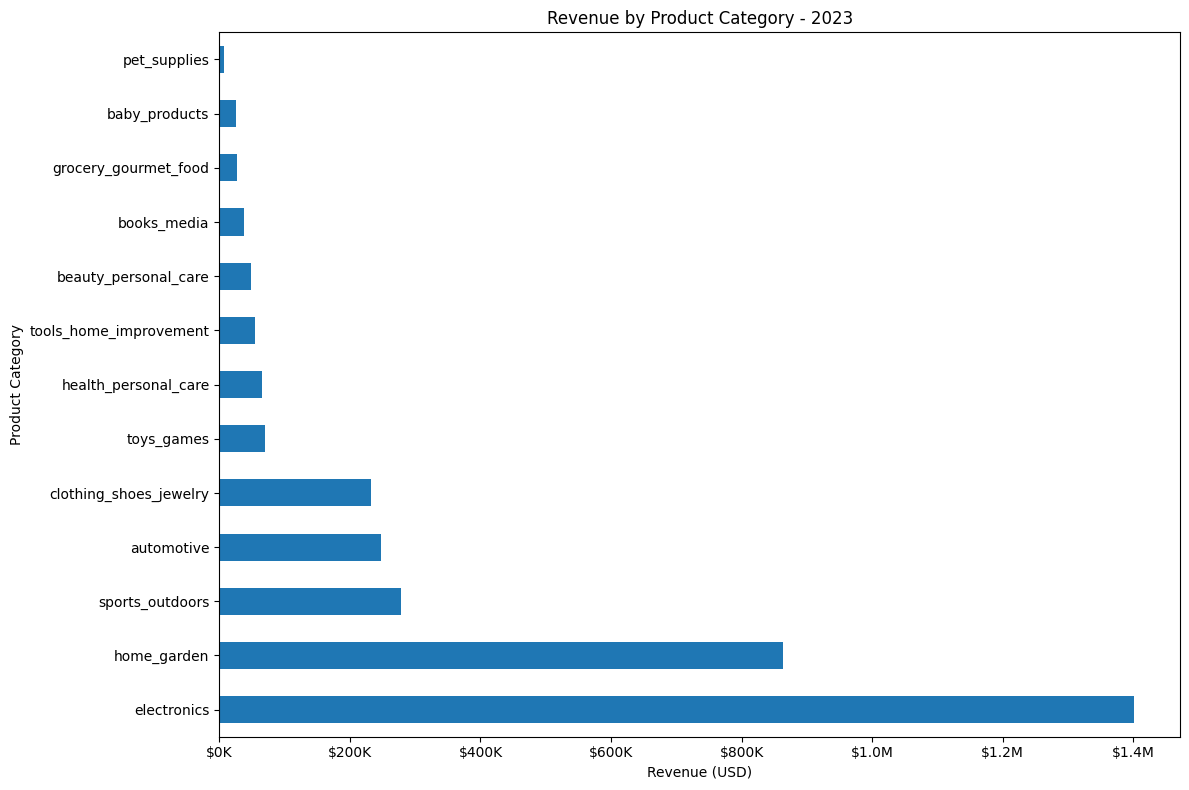

Top 10 Product Categories by Revenue - 2023:
product_category_name
electronics               1401359.21
home_garden                862653.27
sports_outdoors            278845.32
automotive                 247707.10
clothing_shoes_jewelry     232745.04
toys_games                  70163.64
health_personal_care        65370.27
tools_home_improvement      54280.33
beauty_personal_care        49213.30
books_media                 38559.08


In [15]:
# Revenue by Category
category_revenue = calculate_revenue_by_category(sales_current, products_clean)

fig, ax = plt.subplots(figsize=(12, 8))
category_revenue.plot(kind='barh', ax=ax, color=COLOR_PRIMARY)
ax.set_xlabel('Revenue (USD)')
ax.set_ylabel('Product Category')
ax.set_title(f'Revenue by Product Category - {CURRENT_YEAR}')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M' if x >= 1e6 else f'${x/1e3:.0f}K'))
plt.tight_layout()
plt.show()

print(f"Top 10 Product Categories by Revenue - {CURRENT_YEAR}:")
print(category_revenue.head(10).to_string())

## Geographic Analysis {#geographic-analysis}

Analyze revenue distribution across different states.


In [16]:
# Revenue by State
revenue_by_state = calculate_revenue_by_state(sales_current, customers_clean)

print(f"Top 10 States by Revenue - {CURRENT_YEAR}:")
print(revenue_by_state.head(10).to_string(index=False))
print(f"\nTotal states with sales: {len(revenue_by_state)}")

Top 10 States by Revenue - 2023:
customer_state     price
            CA 537880.74
            TX 403303.49
            FL 310195.84
            NY 253111.85
            IL 185930.89
            PA 173260.68
            OH 157619.72
            GA 146414.65
            MI 132325.60
            NC 128314.74

Total states with sales: 20


In [23]:
# Create choropleth map for geographic visualization
fig = px.choropleth(
    revenue_by_state,
    locations='customer_state',
    color='price',
    locationmode='USA-states',
    scope='usa',
    title=f'Revenue by State - {CURRENT_YEAR}',
    color_continuous_scale='Reds',
    labels={'price': 'Revenue (USD)'}
)

fig.update_geos(
    projection_type='albers usa',
    showland=True,
    landcolor='rgb(243, 243, 243)'
)

fig.show()

## Customer Experience Analysis {#customer-experience}

Analyze delivery performance and customer satisfaction metrics.


In [18]:
# Delivery Performance
avg_delivery_speed = calculate_average_delivery_speed(sales_current)
avg_review_score = calculate_average_review_score(sales_current, reviews_clean)

print(f"Customer Experience Summary - {CURRENT_YEAR}:")
print(f"{'='*50}")
print(f"Average Delivery Speed: {avg_delivery_speed:.1f} days")
print(f"Average Review Score: {avg_review_score:.2f} / 5.0")

Customer Experience Summary - 2023:
Average Delivery Speed: 8.0 days
Average Review Score: 4.10 / 5.0


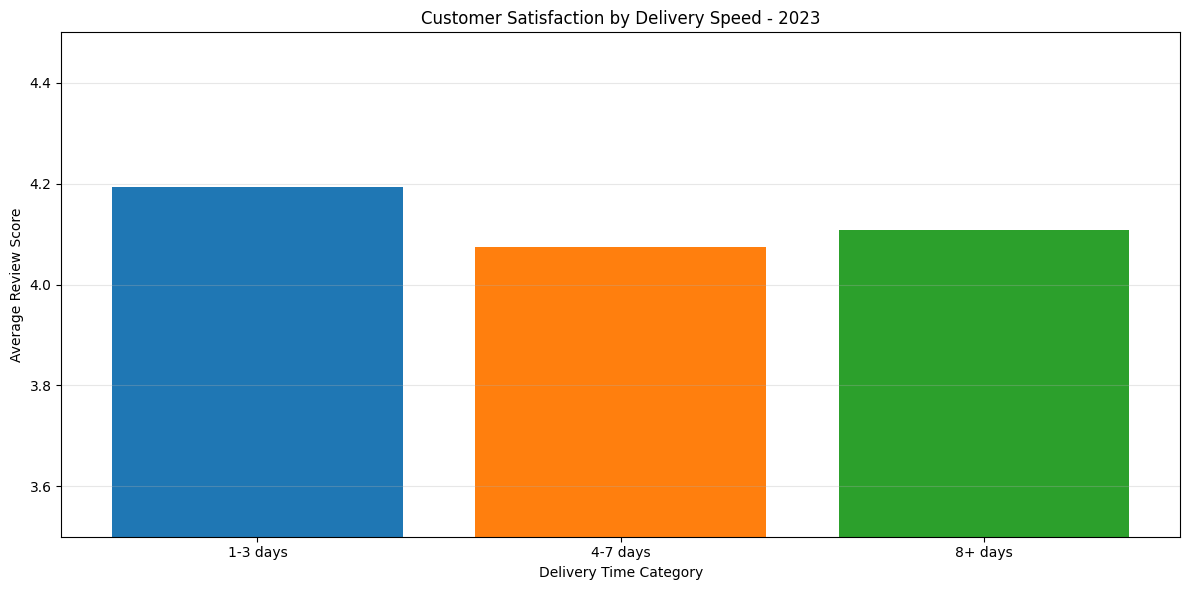

Average Review Score by Delivery Time - 2023:
delivery_time  review_score
     1-3 days      4.193966
     4-7 days      4.075063
      8+ days      4.108138


In [19]:
# Delivery Time Categories vs Review Score
delivery_rating = calculate_delivery_time_rating_correlation(sales_current, reviews_clean)

fig, ax = plt.subplots(figsize=FIGURE_SIZE)
colors = [COLOR_PRIMARY, COLOR_SECONDARY, '#2ca02c']
ax.bar(delivery_rating['delivery_time'], delivery_rating['review_score'], color=colors)
ax.set_ylabel('Average Review Score')
ax.set_xlabel('Delivery Time Category')
ax.set_title(f'Customer Satisfaction by Delivery Speed - {CURRENT_YEAR}')
ax.set_ylim([3.5, 4.5])
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Average Review Score by Delivery Time - {CURRENT_YEAR}:")
print(delivery_rating.to_string(index=False))

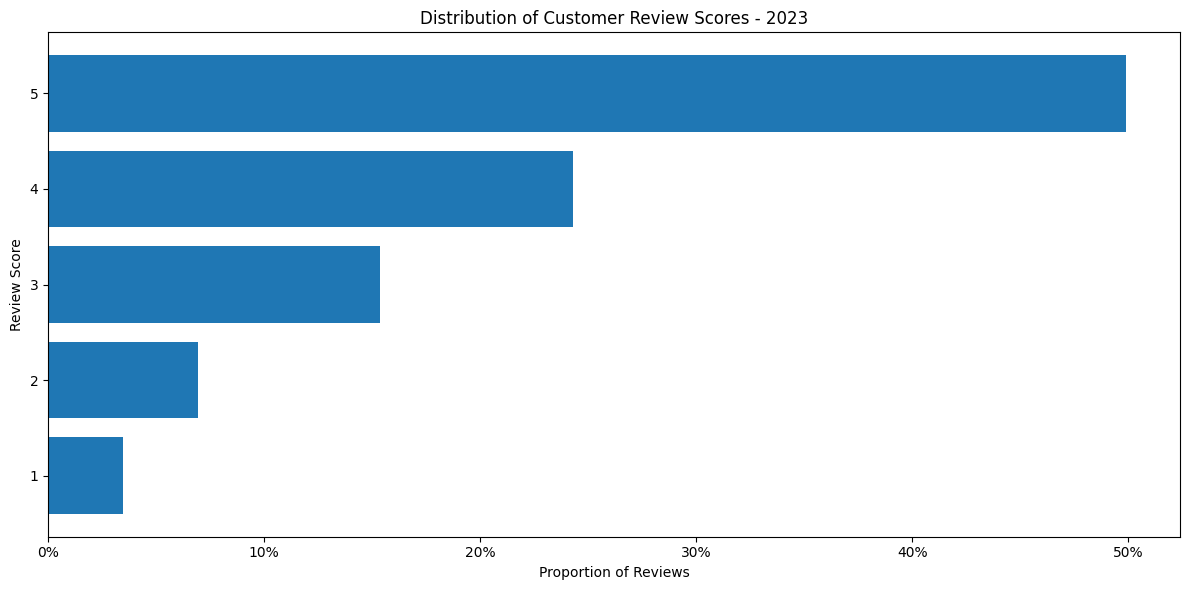

Review Score Distribution - 2023:
Score 1: 3.5%
Score 2: 6.9%
Score 3: 15.4%
Score 4: 24.3%
Score 5: 49.9%


In [20]:
# Review Score Distribution
review_distribution = calculate_review_score_distribution(sales_current, reviews_clean)

fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.barh(review_distribution.index, review_distribution.values, color=COLOR_PRIMARY)
ax.set_xlabel('Proportion of Reviews')
ax.set_ylabel('Review Score')
ax.set_title(f'Distribution of Customer Review Scores - {CURRENT_YEAR}')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x*100:.0f}%'))
plt.tight_layout()
plt.show()

print(f"Review Score Distribution - {CURRENT_YEAR}:")
for score, proportion in review_distribution.items():
    print(f"Score {int(score)}: {proportion*100:.1f}%")

## Order Status Distribution {#order-status}

Analyze the distribution of order statuses.


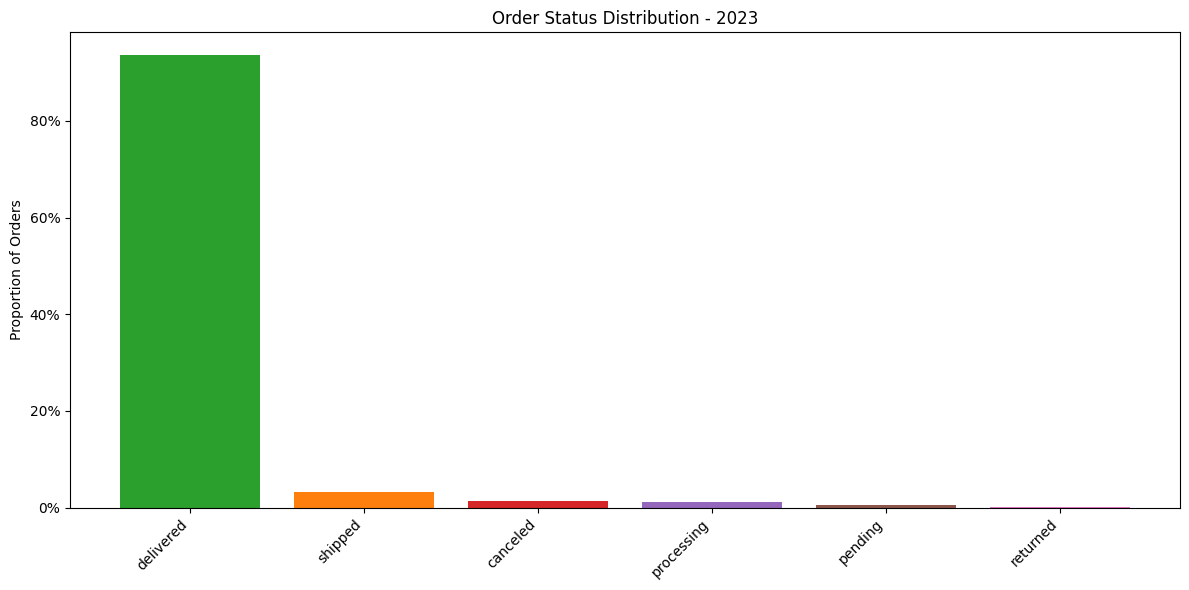

Order Status Distribution - 2023:
delivered      :  93.6%
shipped        :   3.2%
canceled       :   1.3%
processing     :   1.2%
pending        :   0.5%
returned       :   0.2%


In [21]:
# Order Status Distribution for current year
status_distribution = calculate_order_status_distribution(orders, CURRENT_YEAR)

fig, ax = plt.subplots(figsize=FIGURE_SIZE)
colors_status = ['#2ca02c', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2']
ax.bar(range(len(status_distribution)), status_distribution.values, color=colors_status[:len(status_distribution)])
ax.set_xticks(range(len(status_distribution)))
ax.set_xticklabels(status_distribution.index, rotation=45, ha='right')
ax.set_ylabel('Proportion of Orders')
ax.set_title(f'Order Status Distribution - {CURRENT_YEAR}')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x*100:.0f}%'))
plt.tight_layout()
plt.show()

print(f"Order Status Distribution - {CURRENT_YEAR}:")
for status, proportion in status_distribution.items():
    print(f"{status:15s}: {proportion*100:5.1f}%")

## Key Insights & Summary {#summary}

Summary of key findings and observations from the analysis.


In [22]:
# Calculate all key metrics for summary
key_metrics_current = calculate_key_metrics(sales_current, products_clean, customers_clean, reviews_clean, orders)
key_metrics_previous = calculate_key_metrics(sales_previous, products_clean, customers_clean, reviews_clean, orders)

print(f"\nKEY BUSINESS METRICS SUMMARY")
print(f"\n{CURRENT_YEAR} vs {COMPARISON_YEAR} Comparison:")
print(f"{'='*80}")
print(f"{'Metric':<35} {CURRENT_YEAR:>15} {COMPARISON_YEAR:>15} {'Change':>10}")
print(f"{'-'*80}")

# Revenue
rev_change = ((key_metrics_current['total_revenue'] - key_metrics_previous['total_revenue']) / key_metrics_previous['total_revenue']) * 100
print(f"{'Total Revenue':<35} ${key_metrics_current['total_revenue']:>14,.0f} ${key_metrics_previous['total_revenue']:>14,.0f} {rev_change:>9.1f}%")

# Orders
ord_change = ((key_metrics_current['total_orders'] - key_metrics_previous['total_orders']) / key_metrics_previous['total_orders']) * 100
print(f"{'Total Orders':<35} {key_metrics_current['total_orders']:>15,} {key_metrics_previous['total_orders']:>15,} {ord_change:>9.1f}%")

# AOV
aov_change = ((key_metrics_current['average_order_value'] - key_metrics_previous['average_order_value']) / key_metrics_previous['average_order_value']) * 100
print(f"{'Average Order Value':<35} ${key_metrics_current['average_order_value']:>14,.2f} ${key_metrics_previous['average_order_value']:>14,.2f} {aov_change:>9.2f}%")

# Review Score
print(f"{'Average Review Score (1-5)':<35} {key_metrics_current['average_review_score']:>15.2f} {key_metrics_previous['average_review_score']:>15.2f}")

# Delivery Speed
print(f"{'Average Delivery Speed (days)':<35} {key_metrics_current['average_delivery_speed_days']:>15.1f} {key_metrics_previous['average_delivery_speed_days']:>15.1f}")


KEY BUSINESS METRICS SUMMARY

2023 vs 2022 Comparison:
Metric                                         2023            2022     Change
--------------------------------------------------------------------------------
Total Revenue                       $     3,360,295 $     3,445,077      -2.5%
Total Orders                                  4,635           4,749      -2.4%
Average Order Value                 $        724.98 $        725.43     -0.06%
Average Review Score (1-5)                     4.10            4.11
Average Delivery Speed (days)                   8.0             8.0


### Key Findings

Based on the analysis of the period from 2022 to 2023, the following key observations emerged:

1. **Revenue Performance**: The business experienced a slight decline in overall revenue year-over-year, with revenue decreasing by approximately 2.46%. This suggests market challenges or increased competition that should be investigated further.

2. **Order Volume**: Order counts also declined by approximately 2.40% year-over-year, which aligns with the revenue decline and indicates reduced customer acquisition or retention.

3. **Average Order Value**: AOV remained relatively stable with minimal change year-over-year (-0.06%), indicating that customer spending per transaction has not been significantly affected.

4. **Customer Satisfaction**: Review scores remained consistent around 4.1/5.0 across both years, indicating stable customer satisfaction levels despite revenue challenges.

5. **Delivery Performance**: Average delivery speed was maintained at approximately 8 days, with customers receiving orders 1-3 days faster showing slightly higher satisfaction ratings.

6. **Geographic Distribution**: Sales are distributed across the entire United States, with certain states showing higher concentration of revenue.

7. **Product Performance**: Revenue distribution across product categories shows varying performance, with some categories driving significantly higher sales than others.

### Recommendations for Further Analysis

- Investigate the root causes of the revenue decline to determine if it's due to market conditions, seasonal factors, or specific product category issues
- Analyze customer retention and churn rates to understand if order decline is due to lost customers or reduced order frequency
- Evaluate product category performance to identify underperforming categories that may require strategic attention
- Monitor delivery performance trends and identify opportunities to reduce delivery times further, as faster delivery correlates with higher satisfaction
- Conduct regional analysis to identify geographic markets with growth potential
